# 중요변수

In [1]:
import pandas as pd
import numpy as np
from sklearn. preprocessing import scale, minmax_scale, robust_scale
import matplotlib
import matplotlib ;import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
from statsmodels.api import Logit
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn. decomposition import PCA
from sklearn.svm import SVC
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
matplotlib.rc('font',family = 'Noto Sans CJK JP')
import os
os.getcwd()

'/home/piai'

In [2]:
path = '/home/piai/다운로드'
df_all = pd.read_csv(path + "/final_df_all_ver0.4.csv", engine = "python")
df_all.head()

,chaju_id,credit_class,score_risk,gender,age,agegroup,job,edu,dwell_type,house_type,...,loan_period,Pcard_loan_amt,over_period,Pcard_over_amt,over_amt,loan_amt_final2,del_rate,loan_count,overdue_count,income_ind_grp
0,C-1001,C05,478,남성,30,30대,기능/노무직,대학교 졸업,자가,아파트,...,79.0,0.0,2.0,0.0,5700000.0,70300000.0,8.108108,9.0,1.0,300-399만원
1,C-1002,C05,484,여성,66,60대,전업주부,초등학교 졸업,자가,아파트,...,6.0,350000.0,0.0,0.0,0.0,3150000.0,0.000000,2.0,0.0,200-299만원
2,C-1003,C05,478,남성,43,40대,판매/서비스직,대학교 졸업,자가,아파트,...,79.0,0.0,0.0,0.0,0.0,391000000.0,0.000000,5.0,0.0,500-599만원
3,C-1004,C05,445,남성,28,20대,무직/기타,대학교 졸업,자가,아파트,...,5.0,0.0,0.0,0.0,0.0,590000.0,0.000000,2.0,0.0,100-199만원
4,C-1005,C05,421,남성,52,50대,행정관리/전문직,대학교 졸업,자가,아파트,...,40.0,0.0,0.0,0.0,0.0,367200000.0,0.000000,4.0,0.0,300-399만원


In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   chaju_id          1429 non-null   object 
 1   credit_class      1429 non-null   object 
 2   score_risk        1429 non-null   int64  
 3   gender            1429 non-null   object 
 4   age               1429 non-null   int64  
 5   agegroup          1429 non-null   object 
 6   job               1429 non-null   object 
 7   edu               1429 non-null   object 
 8   dwell_type        1429 non-null   object 
 9   house_type        1429 non-null   object 
 10  marriage          1429 non-null   object 
 11  income_home_grp   1429 non-null   object 
 12  expenditure_grp   1429 non-null   object 
 13  child_cd          1429 non-null   object 
 14  no_child          1429 non-null   int64  
 15  flag_priv_biz_cd  1429 non-null   object 
 16  card_count        1429 non-null   float64


In [4]:
df_all = df_all.fillna(0)

In [5]:
df_all.isna().sum()

chaju_id            0
credit_class        0
score_risk          0
gender              0
age                 0
agegroup            0
job                 0
edu                 0
dwell_type          0
house_type          0
marriage            0
income_home_grp     0
expenditure_grp     0
child_cd            0
no_child            0
flag_priv_biz_cd    0
card_count          0
card_period         0
loan_period         0
Pcard_loan_amt      0
over_period         0
Pcard_over_amt      0
over_amt            0
loan_amt_final2     0
del_rate            0
loan_count          0
overdue_count       0
income_ind_grp      0
dtype: int64

In [6]:
df_sample = df_all[['agegroup','job','edu','dwell_type','house_type','marriage','income_home_grp','expenditure_grp','card_count','loan_count','loan_amt_final2','overdue_count','over_amt','del_rate']]
df_sample

,agegroup,job,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate
0,30대,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108
1,60대,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000
2,40대,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000
3,20대,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000
4,50대,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,30대,사무직,전문대학 졸업,전세,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000
1425,40대,기능/노무직,전문대학 졸업,전세,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706
1426,30대,전업주부,전문대학 졸업,자가,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000
1427,40대,사무직,대학교 졸업,자가,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000


In [7]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   agegroup         1429 non-null   object 
 1   job              1429 non-null   object 
 2   edu              1429 non-null   object 
 3   dwell_type       1429 non-null   object 
 4   house_type       1429 non-null   object 
 5   marriage         1429 non-null   object 
 6   income_home_grp  1429 non-null   object 
 7   expenditure_grp  1429 non-null   object 
 8   card_count       1429 non-null   float64
 9   loan_count       1429 non-null   float64
 10  loan_amt_final2  1429 non-null   float64
 11  overdue_count    1429 non-null   float64
 12  over_amt         1429 non-null   float64
 13  del_rate         1429 non-null   float64
dtypes: float64(6), object(8)
memory usage: 156.4+ KB


### 나이

In [8]:
data={'agegroup':['20대','30대','40대','50대','60대','70대','80대이상'], 'agegroup3':['3','4','6','5','5','2','1']}
data
df_age = pd.DataFrame(data)
df_age

,agegroup,agegroup3
0,20대,3
1,30대,4
2,40대,6
3,50대,5
4,60대,5
5,70대,2
6,80대이상,1


In [9]:
df_sample = pd.merge(df_sample,df_age, how = 'left', on='agegroup')
df_age = pd.DataFrame(data)
df_age

,agegroup,agegroup3
0,20대,3
1,30대,4
2,40대,6
3,50대,5
4,60대,5
5,70대,2
6,80대이상,1


In [10]:
df_sample = df_sample.drop('agegroup',axis = 1)

### 직업

In [11]:
data={'job':['무직/기타','행정관리/전문직','기능/노무직','사무직','판매/서비스직','전업주부','학생(재수생포함)'], 'job3':['4','3','3','2','2','1','1']}
data
df_job = pd.DataFrame(data)
df_job

,job,job3
0,무직/기타,4
1,행정관리/전문직,3
2,기능/노무직,3
3,사무직,2
4,판매/서비스직,2
5,전업주부,1
6,학생(재수생포함),1


In [12]:
df_sample = pd.merge(df_sample,df_job, how = 'left', on='job')
df_sample

,job,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3
0,기능/노무직,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3
1,전업주부,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1
2,판매/서비스직,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2
3,무직/기타,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4
4,행정관리/전문직,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,사무직,전문대학 졸업,전세,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2
1425,기능/노무직,전문대학 졸업,전세,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3
1426,전업주부,전문대학 졸업,자가,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1
1427,사무직,대학교 졸업,자가,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2


In [13]:
df_sample = df_sample.drop('job',axis = 1)

### 교육

In [14]:
data={'edu':['초등학교 졸업','전문대학 졸업','대학원 졸업','대학원 재학','고등학교 졸업','대학교 졸업','중학교 졸업','대학교 재학','고등학교 재학','전문대학 재학'], 'edu3':['10','9','8','7','6','5','4','3','1','1']}
data
df_edu = pd.DataFrame(data)
df_edu

,edu,edu3
0,초등학교 졸업,10
1,전문대학 졸업,9
2,대학원 졸업,8
3,대학원 재학,7
4,고등학교 졸업,6
5,대학교 졸업,5
6,중학교 졸업,4
7,대학교 재학,3
8,고등학교 재학,1
9,전문대학 재학,1


In [15]:
df_sample = pd.merge(df_sample,df_edu, how = 'left', on='edu')
df_sample

,edu,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3
0,대학교 졸업,자가,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5
1,초등학교 졸업,자가,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10
2,대학교 졸업,자가,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5
3,대학교 졸업,자가,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5
4,대학교 졸업,자가,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,전문대학 졸업,전세,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9
1425,전문대학 졸업,전세,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9
1426,전문대학 졸업,자가,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9
1427,대학교 졸업,자가,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5


In [16]:
df_sample = df_sample.drop('edu',axis = 1)

In [17]:
df_sample

,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3
0,자가,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5
1,자가,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10
2,자가,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5
3,자가,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5
4,자가,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,전세,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9
1425,전세,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9
1426,자가,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9
1427,자가,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5


### 주거형태

In [18]:
data={'dwell_type':['자가','전세','월세','영구임대','사택/기타'], 'dwell_type3':['4','3','1','2','2']}
data
df_dwell_type = pd.DataFrame(data)
df_dwell_type

,dwell_type,dwell_type3
0,자가,4
1,전세,3
2,월세,1
3,영구임대,2
4,사택/기타,2


In [19]:
df_sample = pd.merge(df_sample,df_dwell_type, how = 'left', on='dwell_type')
df_sample

,dwell_type,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3
0,자가,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4
1,자가,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4
2,자가,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4
3,자가,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4
4,자가,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,전세,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3
1425,전세,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3
1426,자가,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4
1427,자가,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4


In [20]:
df_sample = df_sample.drop('dwell_type',axis = 1)

In [21]:
df_sample

,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3
0,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4
1,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4
2,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4
3,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4
4,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3
1425,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3
1426,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4
1427,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4


### 주택형태

In [22]:
data={'house_type':['기타','단독주택','상가주택','아파트','연립/다세대/빌라','오피스텔'], 'house_type3':['3','5','2','6','4','1']}
data
df_house_type = pd.DataFrame(data)
df_house_type

,house_type,house_type3
0,기타,3
1,단독주택,5
2,상가주택,2
3,아파트,6
4,연립/다세대/빌라,4
5,오피스텔,1


In [23]:
df_sample = pd.merge(df_sample,df_house_type, how = 'left', on='house_type')
df_sample

,house_type,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3,house_type3
0,아파트,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4,6
1,아파트,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4,6
2,아파트,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4,6
3,아파트,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4,6
4,아파트,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,아파트,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3,6
1425,아파트,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3,6
1426,아파트,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4,6
1427,단독주택,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4,5


In [24]:
df_sample = df_sample.drop('house_type',axis = 1)

### 결혼여부

In [25]:
data={'marriage':['기혼','미혼','기타(이혼/별거/사별)'], 'marriage3':['2','1','3']}
data
df_marriage = pd.DataFrame(data)
df_marriage

,marriage,marriage3
0,기혼,2
1,미혼,1
2,기타(이혼/별거/사별),3


In [26]:
df_sample = pd.merge(df_sample,df_marriage, how = 'left', on='marriage')
df_sample

,marriage,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3,house_type3,marriage3
0,미혼,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4,6,1
1,기혼,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4,6,2
2,기혼,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4,6,2
3,미혼,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4,6,1
4,기혼,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,기혼,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3,6,2
1425,기혼,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3,6,2
1426,기혼,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4,6,2
1427,미혼,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4,5,1


In [27]:
df_sample = df_sample.drop('marriage',axis = 1)

In [28]:
df_sample['income_home_grp'].value_counts()

300-399만원    288
500-599만원    280
400-499만원    264
200-299만원    183
600-699만원    177
700-799만원     86
100-199만원     54
800-899만원     36
99만원 이하       30
1000만원 이상     17
900-999만원     14
Name: income_home_grp, dtype: int64

### 가계 대출

In [29]:
data={'income_home_grp':['900-999만원','1000만원 이상','99만원 이하','800-899만원','100-199만원','700-799만원','200-299만원',
                        '600-699만원','400-499만원','300-399만원','500-599만원'], 'income_home_grp3':['1','2','3','4','5','6','7','8','9','10','11']}
data
df_income_home_grp = pd.DataFrame(data)
df_income_home_grp

,income_home_grp,income_home_grp3
0,900-999만원,1
1,1000만원 이상,2
2,99만원 이하,3
3,800-899만원,4
4,100-199만원,5
5,700-799만원,6
6,200-299만원,7
7,600-699만원,8
8,400-499만원,9
9,300-399만원,10


In [30]:
df_sample = pd.merge(df_sample,df_income_home_grp, how = 'left', on='income_home_grp')
df_sample

,income_home_grp,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3,house_type3,marriage3,income_home_grp3
0,900-999만원,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4,6,1,1
1,200-299만원,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4,6,2,7
2,500-599만원,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4,6,2,11
3,500-599만원,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4,6,1,11
4,500-599만원,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4,6,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,500-599만원,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3,6,2,11
1425,300-399만원,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3,6,2,10
1426,300-399만원,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4,6,2,10
1427,300-399만원,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4,5,1,10


In [31]:
df_sample = df_sample.drop('income_home_grp',axis = 1)

In [32]:
df_sample.isna().sum()

expenditure_grp     0
card_count          0
loan_count          0
loan_amt_final2     0
overdue_count       0
over_amt            0
del_rate            0
agegroup3           0
job3                0
edu3                0
dwell_type3         0
house_type3         0
marriage3           0
income_home_grp3    0
dtype: int64

### 개인 지출

In [33]:
data={'expenditure_grp':['100-199만원','99만원 이하','200-299만원','300-399만원','500-599만원','400-499만원'], 'expenditure_grp3':['2','4','3','5','6','1']}
data
df_expenditure_grp = pd.DataFrame(data)
df_expenditure_grp

,expenditure_grp,expenditure_grp3
0,100-199만원,2
1,99만원 이하,4
2,200-299만원,3
3,300-399만원,5
4,500-599만원,6
5,400-499만원,1


In [34]:
df_sample = pd.merge(df_sample,df_expenditure_grp, how = 'left', on='expenditure_grp')
df_sample

,expenditure_grp,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3,house_type3,marriage3,income_home_grp3,expenditure_grp3
0,100-199만원,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4,6,1,1,2
1,99만원 이하,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4,6,2,7,4
2,100-199만원,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4,6,2,11,2
3,99만원 이하,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4,6,1,11,4
4,200-299만원,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4,6,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,99만원 이하,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3,6,2,11,4
1425,100-199만원,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3,6,2,10,2
1426,100-199만원,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4,6,2,10,2
1427,100-199만원,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4,5,1,10,2


In [35]:
df_sample = df_sample.drop('expenditure_grp',axis = 1)

In [36]:
df_sample

,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3,house_type3,marriage3,income_home_grp3,expenditure_grp3
0,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4,6,1,1,2
1,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4,6,2,7,4
2,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4,6,2,11,2
3,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4,6,1,11,4
4,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4,6,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3,6,2,11,4
1425,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3,6,2,10,2
1426,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4,6,2,10,2
1427,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4,5,1,10,2


## 그래디언트 부스팅

In [37]:
df_raw_y = df_sample['del_rate']
df_raw_x = df_sample.drop('del_rate',axis = 1, inplace = False)

In [38]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size =  0.4, random_state = 1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_train_x.shape))
print("test data Y size:{}".format(df_train_y.shape))

train data X size:(857, 13)
train data Y size:(857,)
test data X size:(857, 13)
test data Y size:(857,)


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

In [43]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on testing set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))
gb_uncustomized

Score on training set:0.990
Score on testing set:0.934


GradientBoostingRegressor(random_state=1234)

In [44]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
    gb.fit(df_train_x, df_traiv_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)n_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["Trainscore"] = train_score
df_score_n ["Testscore"] = test_score
df_score_n.round(3)

,n_estimators,Trainscore,Testscore
0,10,0.792,0.722
1,20,0.921,0.853
2,30,0.954,0.887
3,40,0.974,0.913
4,50,0.981,0.921
5,60,0.985,0.926
6,70,0.986,0.928
7,80,0.987,0.929
8,90,0.988,0.929
9,100,0.990,0.934


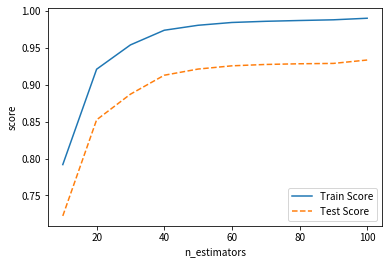

In [45]:
plt.plot(para_n_tree, train_score, linestyle ="-",label="Train Score")
plt.plot(para_n_tree, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()df_raw_y = df_sample['del_rate']


In [47]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]
for v_min_sample_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234,n_estimators=50, min_samples_leaf=v_min_sample_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
   
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["Trainscore"] = train_score
df_score_leaf["Testscore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,Trainscore,Testscore
0,1,0.981,0.921
1,2,0.981,0.926
2,3,0.979,0.926
3,4,0.977,0.922
4,5,0.979,0.927
5,6,0.977,0.924
6,7,0.978,0.925
7,8,0.978,0.925
8,9,0.977,0.923
9,10,0.977,0.924


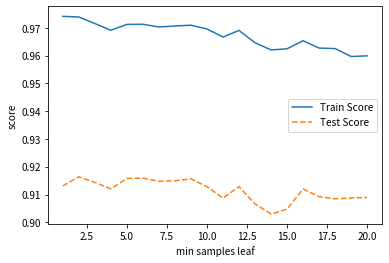

In [49]:
plt.plot(para_leaf, train_score, linestyle ="-",label="Train Score")
plt.plot(para_leaf, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [50]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2, 21)]
for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 50, min_samples_leaf=12, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["Trainscore"] = train_score
df_score_split["Testscore"] = test_score
df_score_split.round(3)

,MinSampleSplit,Trainscore,Testscore
0,4,0.977,0.925
1,6,0.977,0.925
2,8,0.977,0.925
3,10,0.977,0.925
4,12,0.977,0.925
5,14,0.977,0.925
6,16,0.977,0.925
7,18,0.977,0.925
8,20,0.977,0.925
9,22,0.977,0.925


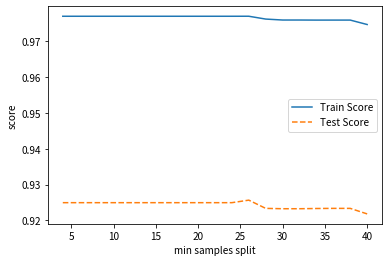

In [51]:
plt.plot(para_split, train_score, linestyle ="-",label="Train Score")
plt.plot(para_split, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [52]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 50, min_samples_leaf=12, min_samples_split=25, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["Trainscore"] = train_score
df_score_depth ["Testscore"] = test_score
df_score_depth.round(3)

,Depth,Trainscore,Testscore
0,1,0.866,0.794
1,2,0.922,0.856
2,3,0.977,0.926
3,4,0.985,0.940
4,5,0.991,0.948
5,6,0.993,0.952
6,7,0.994,0.955
7,8,0.995,0.954
8,9,0.995,0.955
9,10,0.995,0.955


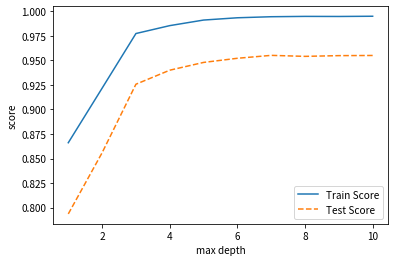

In [53]:
plt.plot(para_depth, train_score, linestyle ="-",label="Train Score")
plt.plot(para_depth, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [54]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 50, min_samples_leaf=12
                                   , min_samples_split=25, max_depth=4,learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_lr = pd.DataFrame()
df_score_lr["Learningtime"] = para_lr
df_score_lr["Trainscore"] = train_score
df_score_lr["Testscore"] = test_score
df_score_lr.round(3)

,Learningtime,Trainscore,Testscore
0,0.1,0.985,0.940
1,0.2,0.991,0.945
2,0.3,0.994,0.949
3,0.4,0.995,0.941
4,0.5,0.996,0.948
5,0.6,0.996,0.934
6,0.7,0.996,0.937
7,0.8,0.997,0.945
8,0.9,0.997,0.935


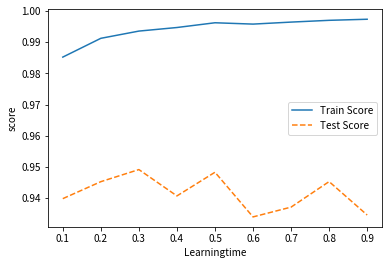

In [55]:
plt.plot(para_lr, train_score, linestyle ="-",label="Train Score")
plt.plot(para_lr, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("Learningtime")
plt.legend()

In [56]:
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators =50, min_samples_leaf=12, 
                                     min_samples_split=25,max_depth=4,learning_rate = 0.3)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on testing set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.994
Score on testing set:0.949


In [57]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
4,over_amt,0.776
1,loan_count,0.147
2,loan_amt_final2,0.074
11,income_home_grp3,0.001
3,overdue_count,0.001
12,expenditure_grp3,0.000
9,house_type3,0.000
0,card_count,0.000
7,edu3,0.000
8,dwell_type3,0.000


Text(0, 0.5, '변수')

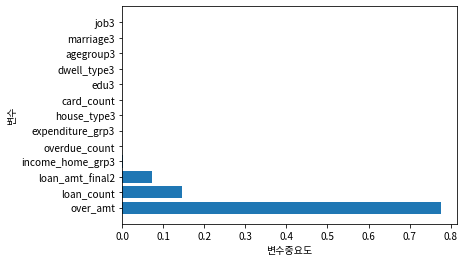

In [58]:
df_importance.sort_values("Importance",ascending = False, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수중요도")
plt.ylabel("변수")

# Thin_filer 중요변수

In [59]:
df_sample

,card_count,loan_count,loan_amt_final2,overdue_count,over_amt,del_rate,agegroup3,job3,edu3,dwell_type3,house_type3,marriage3,income_home_grp3,expenditure_grp3
0,4.0,9.0,70300000.0,1.0,5700000.0,8.108108,4,3,5,4,6,1,1,2
1,6.0,2.0,3150000.0,0.0,0.0,0.000000,5,1,10,4,6,2,7,4
2,2.0,5.0,391000000.0,0.0,0.0,0.000000,6,2,5,4,6,2,11,2
3,1.0,2.0,590000.0,0.0,0.0,0.000000,3,4,5,4,6,1,11,4
4,3.0,4.0,367200000.0,0.0,0.0,0.000000,5,3,5,4,6,2,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,0.0,2.0,7900000.0,0.0,0.0,0.000000,4,2,9,3,6,2,11,4
1425,0.0,1.0,1360000.0,1.0,500000.0,36.764706,6,3,9,3,6,2,10,2
1426,5.0,17.0,61340000.0,0.0,0.0,0.000000,4,1,9,4,6,2,10,2
1427,1.0,2.0,68000000.0,0.0,0.0,0.000000,6,2,5,4,5,1,10,2


In [66]:
df_thin = df_sample[['agegroup3','job3','edu3','dwell_type3','del_rate','house_type3','marriage3','income_home_grp3','expenditure_grp3']]
df_thin

,agegroup3,job3,edu3,dwell_type3,del_rate,house_type3,marriage3,income_home_grp3,expenditure_grp3
0,4,3,5,4,8.108108,6,1,1,2
1,5,1,10,4,0.000000,6,2,7,4
2,6,2,5,4,0.000000,6,2,11,2
3,3,4,5,4,0.000000,6,1,11,4
4,5,3,5,4,0.000000,6,2,11,3
...,...,...,...,...,...,...,...,...,...
1424,4,2,9,3,0.000000,6,2,11,4
1425,6,3,9,3,36.764706,6,2,10,2
1426,4,1,9,4,0.000000,6,2,10,2
1427,6,2,5,4,0.000000,5,1,10,2


In [67]:
df_raw_y = df_thin["del_rate"]
df_raw_x = df_thin.drop("del_rate",axis = 1)
df_raw_x

,agegroup3,job3,edu3,dwell_type3,house_type3,marriage3,income_home_grp3,expenditure_grp3
0,4,3,5,4,6,1,1,2
1,5,1,10,4,6,2,7,4
2,6,2,5,4,6,2,11,2
3,3,4,5,4,6,1,11,4
4,5,3,5,4,6,2,11,3
...,...,...,...,...,...,...,...,...
1424,4,2,9,3,6,2,11,4
1425,6,3,9,3,6,2,10,2
1426,4,1,9,4,6,2,10,2
1427,6,2,5,4,5,1,10,2


In [68]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size =  0.4, random_state = 1234)
print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(857, 8)
train data Y size:(857,)
test data X size:(572, 8)
test data Y size:(572,)


In [70]:
gb_uncustomized = GradientBoostingRegressor(random_state = 1234)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_uncustomized.score(df_train_x,df_train_y)))
print("Score on testing set:{:.3f}".format(gb_uncustomized.score(df_test_x,df_test_y)))
gb_uncustomized

Score on training set:0.166
Score on testing set:-0.062


GradientBoostingRegressor(random_state=1234)

In [71]:
train_score = []; test_score = []
para_n_tree = [n_tree*10 for n_tree in range(1,11)]
for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["Trainscore"] = train_score
df_score_n ["Testscore"] = test_score
df_score_n.round(3)

,n_estimators,Trainscore,Testscore
0,10,0.050,-0.010
1,20,0.078,-0.019
2,30,0.098,-0.027
3,40,0.111,-0.032
4,50,0.123,-0.041
5,60,0.135,-0.046
6,70,0.145,-0.049
7,80,0.152,-0.053
8,90,0.162,-0.057
9,100,0.166,-0.062


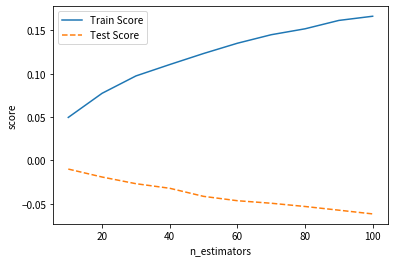

In [72]:
plt.plot(para_n_tree, train_score, linestyle ="-",label="Train Score")
plt.plot(para_n_tree, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("n_estimators")
plt.legend()

In [79]:
train_score = []; test_score = []
para_leaf = [n_leaf*1 for n_leaf in range(1,21)]
for v_min_sample_leaf in para_leaf:
    rf = GradientBoostingRegressor(random_state=1234,n_estimators=20, min_samples_leaf=v_min_sample_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
   
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["Trainscore"] = train_score
df_score_leaf["Testscore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,Trainscore,Testscore
0,1,0.078,-0.019
1,2,0.073,-0.019
2,3,0.074,-0.020
3,4,0.071,-0.020
4,5,0.067,-0.021
5,6,0.066,-0.021
6,7,0.066,-0.024
7,8,0.066,-0.023
8,9,0.066,-0.023
9,10,0.063,-0.021


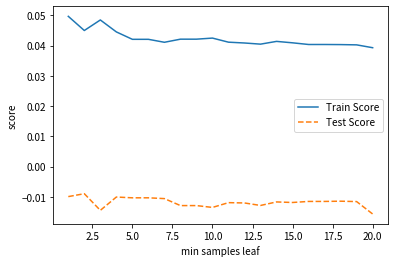

In [78]:
plt.plot(para_leaf, train_score, linestyle ="-",label="Train Score")
plt.plot(para_leaf, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples leaf")
plt.legend()

In [81]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2, 21)]
for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=4, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_split = pd.DataFrame()
df_score_split["MinSampleSplit"] = para_split
df_score_split["Trainscore"] = train_score
df_score_split["Testscore"] = test_score
df_score_split.round(3)

,MinSampleSplit,Trainscore,Testscore
0,4,0.071,-0.020
1,6,0.071,-0.020
2,8,0.071,-0.020
3,10,0.071,-0.020
4,12,0.070,-0.023
5,14,0.070,-0.023
6,16,0.070,-0.023
7,18,0.070,-0.023
8,20,0.068,-0.020
9,22,0.066,-0.021


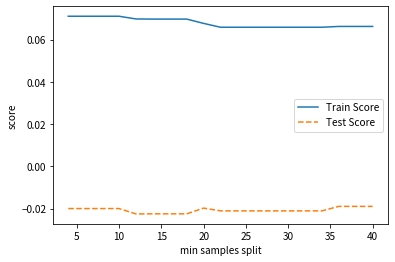

In [82]:
plt.plot(para_split, train_score, linestyle ="-",label="Train Score")
plt.plot(para_split, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("min samples split")
plt.legend()

In [84]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=4, min_samples_split=10, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["Trainscore"] = train_score
df_score_depth ["Testscore"] = test_score
df_score_depth.round(3)

,Depth,Trainscore,Testscore
0,1,0.016,-0.006
1,2,0.040,-0.012
2,3,0.071,-0.020
3,4,0.106,-0.023
4,5,0.138,-0.027
5,6,0.167,-0.038
6,7,0.205,-0.041
7,8,0.243,-0.067
8,9,0.268,-0.084
9,10,0.298,-0.077


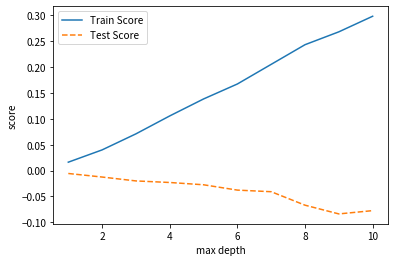

In [85]:
plt.plot(para_depth, train_score, linestyle ="-",label="Train Score")
plt.plot(para_depth, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("max depth")
plt.legend()

In [87]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators = 20, min_samples_leaf=4
                                   , min_samples_split=10, max_depth=3,learning_rate = v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
   
df_score_lr = pd.DataFrame()
df_score_lr["Learningtime"] = para_lr
df_score_lr["Trainscore"] = train_score
df_score_lr["Testscore"] = test_score
df_score_lr.round(3)

,Learningtime,Trainscore,Testscore
0,0.1,0.071,-0.020
1,0.2,0.106,-0.034
2,0.3,0.128,-0.048
3,0.4,0.146,-0.057
4,0.5,0.166,-0.083
5,0.6,0.169,-0.075
6,0.7,0.180,-0.095
7,0.8,0.182,-0.089
8,0.9,0.181,-0.096


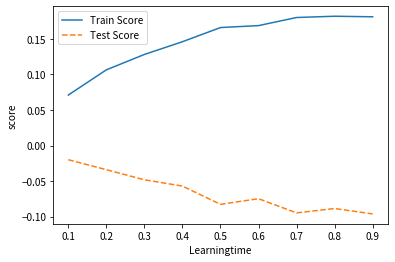

In [88]:
plt.plot(para_lr, train_score, linestyle ="-",label="Train Score")
plt.plot(para_lr, test_score, linestyle ="--",label="Test Score")
plt.ylabel("score"); plt.xlabel("Learningtime")
plt.legend()

In [89]:
gb_final = GradientBoostingRegressor(random_state=1234,n_estimators =20, min_samples_leaf=4, 
                                     min_samples_split=10,max_depth=3,learning_rate = 0.6)
gb_final.fit(df_train_x, df_train_y)
print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on testing set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))
gb_final

Score on training set:0.169
Score on testing set:-0.075


GradientBoostingRegressor(learning_rate=0.6, min_samples_leaf=4,
                          min_samples_split=10, n_estimators=20,
                          random_state=1234)

In [90]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance",ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,edu3,0.254
0,agegroup3,0.187
6,income_home_grp3,0.162
3,dwell_type3,0.143
1,job3,0.089
7,expenditure_grp3,0.065
5,marriage3,0.062
4,house_type3,0.036
